In [2]:
# notebooks/eda.ipynb

import pandas as pd

# Load the dataset
df = pd.read_csv('../data/Housing.csv')

# Show first few rows
print("📌 First 5 rows:")
print(df.head())



📌 First 5 rows:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [3]:
# Dataset shape
print("\n📌 Dataset Shape:")
print(df.shape)




📌 Dataset Shape:
(545, 13)


In [5]:

# Info summary (data types, non-nulls)
print("\n📌 Info:")
print(df.info())


📌 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None


In [6]:
# Missing values
print("\n📌 Missing Values:")
print(df.isnull().sum())


📌 Missing Values:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [9]:
# Encode 'yes'/'no' to 1/0
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
df[binary_cols] = df[binary_cols].applymap(lambda x: 1 if x == 'yes' else 0)

# One-hot encode 'furnishingstatus'
df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)


C:\Users\Shree\AppData\Local\Temp\ipykernel_13180\4237524631.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[binary_cols] = df[binary_cols].applymap(lambda x: 1 if x == 'yes' else 0)


c:\Users\Shree\Desktop\ML Projects\House_Price_Prediction_Project\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


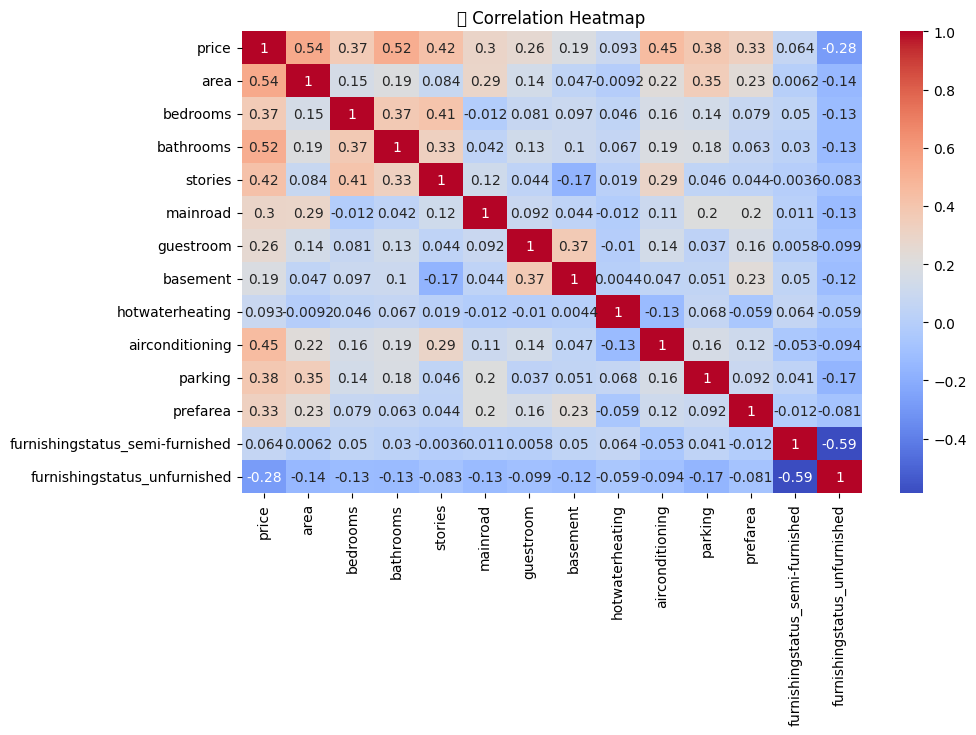

In [10]:
# Correlation heatmap (after encoding)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("📊 Correlation Heatmap")
plt.show()

In [11]:
print("\nFinal encoded column names:")
print(df.columns.tolist())


Final encoded column names:
['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished']


c:\Users\Shree\Desktop\ML Projects\House_Price_Prediction_Project\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


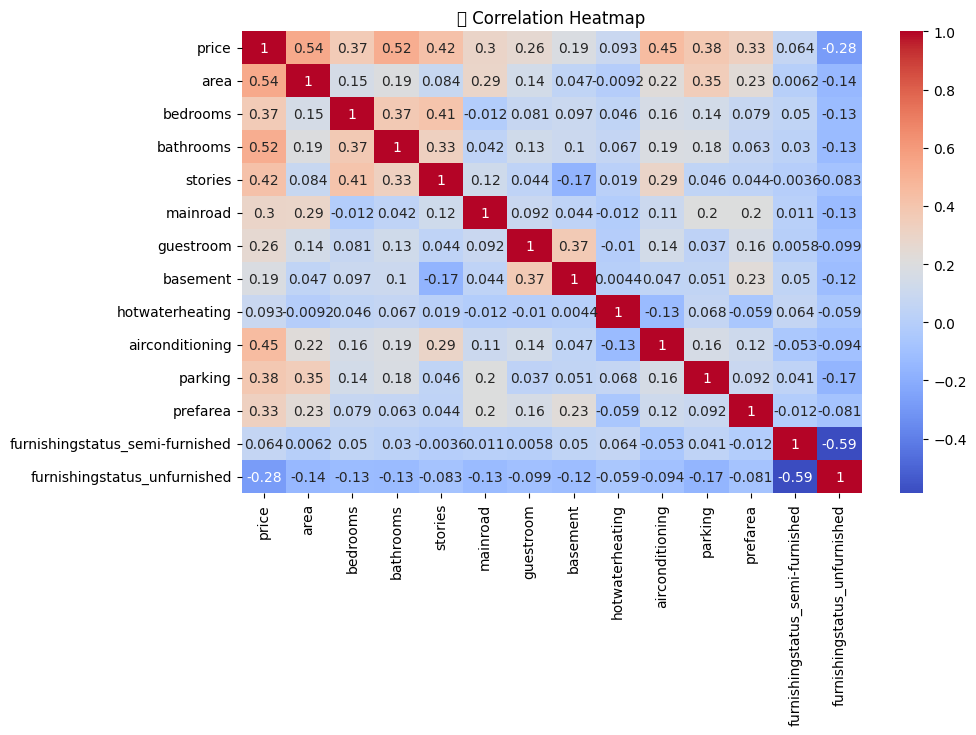

c:\Users\Shree\Desktop\ML Projects\House_Price_Prediction_Project\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127968 (\N{HOUSE BUILDING}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


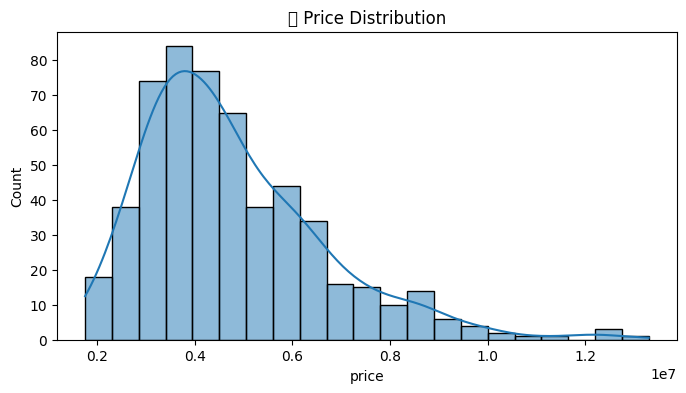

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("📊 Correlation Heatmap")
plt.show()

# Distribution of price
plt.figure(figsize=(8, 4))
sns.histplot(df['price'], kde=True)
plt.title("🏠 Price Distribution")
plt.show()

In [15]:
# Step 1: Confirm binary columns correctly
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
df[binary_cols] = df[binary_cols].applymap(lambda x: 1 if x == 'yes' else 0)

# Step 2: Double-check if 'furnishingstatus' exists before encoding
if 'furnishingstatus' in df.columns:
    df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)
else:
    print("⚠️ 'furnishingstatus' column not found. Skipping one-hot encoding.")


⚠️ 'furnishingstatus' column not found. Skipping one-hot encoding.


C:\Users\Shree\AppData\Local\Temp\ipykernel_13180\2588975507.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[binary_cols] = df[binary_cols].applymap(lambda x: 1 if x == 'yes' else 0)


In [16]:
print("🔍 Current Columns:", df.columns.tolist())

🔍 Current Columns: ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished']
